# Bilgisayar Özellikleri Veri Analizi

In [487]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

import joblib


df = pd.read_excel("data.xlsx")

df_test = pd.read_excel("test.xlsx")

In [488]:
df.head(10)

,Bellek Hızı,Cihaz Ağırlığı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci Nesli,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Maksimum İşlemci Hızı,Max Ekran Çözünürlüğü,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli,Fiyat
0,1066 MHz,NaN,10 inç,NaN,1 GB,NaN,IPS,1.Nesil,1000M,Android,NaN,0,"1,05 GHz",NaN,NaN,NaN,1 TB,Notebook,Çok Yüksek
1,1066 MHz,NaN,10 inç,NaN,1 GB,NaN,IPS,1.Nesil,1000M,Android,NaN,0,"1,05 GHz",NaN,NaN,NaN,1 TB,Notebook,Çok Yüksek
2,1066 MHz,NaN,10 inç,NaN,1 GB,NaN,IPS,1.Nesil,1000M,Android,NaN,0,"1,05 GHz",NaN,NaN,NaN,1 TB,Notebook,Orta
3,3200 MHz,1 - 2 kg,"15,6 inç",GDDR4,2 GB,Harici Ekran Kartı,LED,10. Nesil,1035G1,Windows 10 Home,Var,0,"3,6 GHz",1920 x 1080,Yok,8 GB,512 GB,Notebook,Düşük
4,3200 MHz,1 - 2 kg,"15,6 inç",GDDR5,2 GB,Harici Ekran Kartı,LED,10. Nesil,1035G1,Windows 10 Home,Yok,0,"3,6 GHz",1920 x 1080,Yok,12 GB,1 TB,Notebook,Düşük
5,2933 MHz,2 - 4 kg,"15,6 inç",GDDR6,4 GB,Yüksek Seviye Harici Ekran Kartı,IPS,10. Nesil,10300H,Yok (Free Dos),Yok,0,"4,5 GHz",1920 x 1080,Yok,16 GB,512 GB,Oyun Bilgisayarları,Düşük
6,2933 MHz,2 - 4 kg,"15,6 inç",GDDR6,4 GB,Yüksek Seviye Harici Ekran Kartı,IPS,10. Nesil,10300H,Yok (Free Dos),NaN,1,"4,5 GHz",1920 x 1080,NaN,8 GB,512 GB,Oyun Bilgisayarları,Düşük
7,3200 MHz,2 - 4 kg,"15,6 inç",GDDR6,4 GB,Harici Ekran Kartı,IPS,10. Nesil,10300H,Yok (Free Dos),Yok,1,"4,5 GHz",1920 x 1080,Var,8 GB,256 GB,Oyun Bilgisayarları,Düşük
8,3200 MHz,2 - 4 kg,"15,6 inç",GDDR6,4 GB,Yüksek Seviye Harici Ekran Kartı,IPS,10. Nesil,10300H,Windows 11 Pro,Yok,1,"4,5 GHz",1920 x 1080,Yok,32 GB,512 GB,Oyun Bilgisayarları,Orta
9,3200 MHz,2 - 4 kg,"15,6 inç",GDDR6,4 GB,Yüksek Seviye Harici Ekran Kartı,IPS,10. Nesil,10300H,Windows 10 Home,Yok,1,"4,5 GHz",1920 x 1080,Yok,16 GB,256 GB,Oyun Bilgisayarları,Orta


# Tanımlayıcı Veri Analizi

In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Bellek Hızı              888 non-null    object
 1   Cihaz Ağırlığı           985 non-null    object
 2   Ekran Boyutu             994 non-null    object
 3   Ekran Kartı Bellek Tipi  884 non-null    object
 4   Ekran Kartı Hafızası     946 non-null    object
 5   Ekran Kartı Tipi         955 non-null    object
 6   Ekran Panel Tipi         994 non-null    object
 7   İşlemci Nesli            946 non-null    object
 8   İşlemci                  979 non-null    object
 9   İşletim Sistemi          994 non-null    object
 10  Kart Okuyucu             864 non-null    object
 11  Aydınlatma               994 non-null    int64 
 12  Maksimum İşlemci Hızı    950 non-null    object
 13  Max Ekran Çözünürlüğü    988 non-null    object
 14  Parmak İzi Okuyucu       886 non-null    o

In [490]:
# Kayıt sayı
kayit_sayisi = len(df)
print(f"Kayıt Sayısı:{kayit_sayisi}")

Kayıt Sayısı:994


In [491]:
nitelik_sayisi = len(df.columns)
print(f"Nitelik Sayısı: {nitelik_sayisi}")

Nitelik Sayısı: 19


In [492]:
df_without_duplicates = df.drop_duplicates(inplace=True)

In [493]:
df.shape

(742, 19)

In [494]:
nitelik_tipleri = df.dtypes
print("Nitelik Tipleri:")
print(nitelik_tipleri)

Nitelik Tipleri:
Bellek Hızı                object
Cihaz Ağırlığı             object
Ekran Boyutu               object
Ekran Kartı Bellek Tipi    object
Ekran Kartı Hafızası       object
Ekran Kartı Tipi           object
Ekran Panel Tipi           object
İşlemci Nesli              object
İşlemci                    object
İşletim Sistemi            object
Kart Okuyucu               object
Aydınlatma                  int64
Maksimum İşlemci Hızı      object
Max Ekran Çözünürlüğü      object
Parmak İzi Okuyucu         object
Ram (Sistem Belleği)       object
SSD Kapasitesi             object
Ürün Modeli                object
Fiyat                      object
dtype: object


In [495]:
# Sadece sayısal sütunlar
sayisal_veriler = df.select_dtypes(include=[np.number])

# Sadece sayısal sütunların ortalaması
merkezi_egilim = sayisal_veriler.mean()
print("Merkezi Eğilim Ölçüleri:")
print(merkezi_egilim)

Merkezi Eğilim Ölçüleri:
Aydınlatma    0.250674
dtype: float64


In [496]:
# Sadece sayısal sütunlar
sayisal_veriler = df.select_dtypes(include=[np.number])

# Sadece sayısal sütunların standart sapması
dagilim_olculeri = sayisal_veriler.std()
print("Merkezden Dağılım Ölçüleri:")
print(dagilim_olculeri)

Merkezden Dağılım Ölçüleri:
Aydınlatma    0.433693
dtype: float64


In [497]:
# 5 sayı özeti
bes_sayi_ozeti = df.describe().loc[['min', '25%', '50%', '75%', 'max']]
print("5 Sayı Özeti:")
print(bes_sayi_ozeti)

5 Sayı Özeti:
     Aydınlatma
min        0.00
25%        0.00
50%        0.00
75%        0.75
max        1.00


In [498]:
df['Bellek Hızı'].unique()

array(['1066 MHz', '3200 MHz', '2933 MHz', nan, '2666 MHz', '2400 MHz',
       '3000 MHz', '3733 MHz', '4267 MHz', '4800 MHz', '5200 MHz',
       '4266 MHz', '6400 MHz', '1600 MHz', '5500 MHz', '1866 MHz',
       '2133 MHz'], dtype=object)

In [499]:
df['Cihaz Ağırlığı'].unique()

array([nan, '1 - 2 kg', '2 - 4 kg', '2 kg ve Altı', '4 kg ve Üstü'],
      dtype=object)

In [500]:
df['Ekran Boyutu'].unique()

array(['10 inç', '15,6 inç', '13,3 inç', '14 inç', '17,3 inç', '13 inç',
       '16 inç', '16,1 inç', '12,3 inç', '14,1 inç', '18 inç', '18,4 inç',
       '17 inç', '13,4 inç', '15 inç', '13,5 inç', '11,6 inç'],
      dtype=object)

In [501]:
df['Ekran Kartı Bellek Tipi'].unique()

array([nan, 'GDDR4', 'GDDR5', 'GDDR6', 'Onboard', 'DDR3', 'DDR5',
       'GDDR6X'], dtype=object)

In [502]:
df['Ekran Kartı Hafızası'].unique()

array(['1 GB', '2 GB', '4 GB', '8 GB', 'Paylaşımlı', '6 GB', nan, '12 GB',
       '16 GB'], dtype=object)

In [503]:
df['Ekran Kartı Tipi'].unique()

array([nan, 'Harici Ekran Kartı', 'Yüksek Seviye Harici Ekran Kartı',
       'Dahili Ekran Kartı'], dtype=object)

In [504]:
df['Ekran Panel Tipi'].unique()

array(['IPS', 'LED', 'TN', 'SVA', 'WVA', 'OLED', 'LTPS', 'Mini LED',
       'Liquid Retina Ekran', 'Liquid Retina XDR'], dtype=object)

In [505]:
df['İşlemci Nesli'].unique()

array(['1.Nesil', '10. Nesil', '10.Nesil', 'Yok', '11.Nesil', '12.Nesil',
       '13.Nesil', '3.Nesil', '4.Nesil', '5.Nesil', '6.Nesil', '7.Nesil',
       '8.Nesil', '9.Nesil', 'Apple M2', 'Apple M2 Max', 'Apple M2 Pro',
       'İntel N Serisi', 'M2', 'M2 Max', 'M2 Pro', 'Ryzen', nan],
      dtype=object)

In [506]:
df['İşlemci'].unique()

array(['1000M', '1035G1', '10300H', '1135G7', 'N4020', '1065G7', '1005G1',
       '10110U', '10. Nesil Intel® Core™ i3-10110U işlemci', '10200H',
       '10750H', 'N5030', '10510U', '10210U', 'Celeron N4020', '1165G7',
       '1155G7', '11320H', '11260H', '11370H', '11400H', '5600H',
       '11800H', '11390H', '11600H', '1115G4', nan, '1195G7', '1125G4',
       '12700H', '1255U', '1235U', '1260P', '12500H', '12450H', '12800H',
       '12900HK', '12650H', '12900H', '1215U', '1240P', '13980HX',
       '13900HX', '13500H', '6800H', '13700H', '13620H', '13650HX',
       '13500HX', '13900H', '13700HX', '3700U', '3250U', 'AMD Ryzen 5',
       'N4120', '5800H', 'T5600', '5500U', '5625U', '5825U', '5300U',
       '5700U', '5675U', '6800HS', '6600H', '5257U', '1035G16', '7735HS',
       '7940HS', '7320U', '7520U', '7530U', '7Y57', '7Y75', '8565U',
       '9880H', '9300H', 'Apple M2', 'Apple M2 Max', 'Apple M2 Pro',
       '5900HX', '4600H', '7730U', 'AMD R7-5700U', 'Apple M1', 'N4150',
       '

In [507]:
df['İşletim Sistemi'].unique()

array(['Android', 'Windows 10 Home', 'Yok (Free Dos)', 'Windows 11 Pro',
       'Windows 11 Home', 'Windows 10 Pro', 'Ubuntu', 'macOS',
       'Chrome OS'], dtype=object)

In [508]:
df['Kart Okuyucu'].unique()

array([nan, 'Var', 'Yok'], dtype=object)

In [509]:
df['Aydınlatma'].unique()

array([0, 1], dtype=int64)

In [510]:
df['Maksimum İşlemci Hızı'].unique()

array(['1,05 GHz', '3,6 GHz', '4,5 GHz', '2,4 GHz', '2,8 GHz', '3,9 GHz',
       '3,4 GHz', '4,1 GHz', '2,1 GHz', '4,2 GHz', '5 GHz', '3,1 GHz',
       '4,9 GHz', '3,5 GHz', '1,1 GHz', '4,7 GHz', '4,4 GHz', '4,8 GHz',
       '4,6 GHz', '2,3 GHz', '2,2 GHz', '3 GHz', '2,5 GHz', '1,2 GHz',
       '3,7 GHz', '3,2 GHz', '4,3 GHz', '5,6 GHz', '5,4 GHz', '5,5 Ghz',
       '4 GHz', '2,6 GHz', '4,0 GHz', '3,8 GHz', '5,2 GHz', nan, '2 GHz',
       '1,8 GHz'], dtype=object)

In [511]:
df['Max Ekran Çözünürlüğü'].unique()

array([nan, '1920 x 1080', '1366 x 768', '1921 x 1080', '1920 x 1200',
       '2560 x 1440', '1924 x 1080', '1933 x 1080', '1926 x 1080',
       '1920 x 1280', '3840 x 2400', '3840 x 2160', '2560 x 1600',
       '2520 x 1680', '2880 x 1800', '3072 x 1920', '1922 x 1080',
       '2880 x 1864', '3456 x 2234', '3024 x 1964', '2880 x 1620'],
      dtype=object)

In [512]:
df['Parmak İzi Okuyucu'].unique()

array([nan, 'Yok', 'Var'], dtype=object)

In [513]:
df['Ram (Sistem Belleği)'].unique()

array([nan, '8 GB', '12 GB', '16 GB', '32 GB', '4 GB', '20 GB', '24 GB',
       '40 GB', '36 GB', '64 GB', '8\xa0GB', '128 GB'], dtype=object)

In [514]:
df.head()

,Bellek Hızı,Cihaz Ağırlığı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,Ekran Panel Tipi,İşlemci Nesli,İşlemci,İşletim Sistemi,Kart Okuyucu,Aydınlatma,Maksimum İşlemci Hızı,Max Ekran Çözünürlüğü,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Ürün Modeli,Fiyat
0,1066 MHz,NaN,10 inç,NaN,1 GB,NaN,IPS,1.Nesil,1000M,Android,NaN,0,"1,05 GHz",NaN,NaN,NaN,1 TB,Notebook,Çok Yüksek
2,1066 MHz,NaN,10 inç,NaN,1 GB,NaN,IPS,1.Nesil,1000M,Android,NaN,0,"1,05 GHz",NaN,NaN,NaN,1 TB,Notebook,Orta
3,3200 MHz,1 - 2 kg,"15,6 inç",GDDR4,2 GB,Harici Ekran Kartı,LED,10. Nesil,1035G1,Windows 10 Home,Var,0,"3,6 GHz",1920 x 1080,Yok,8 GB,512 GB,Notebook,Düşük
4,3200 MHz,1 - 2 kg,"15,6 inç",GDDR5,2 GB,Harici Ekran Kartı,LED,10. Nesil,1035G1,Windows 10 Home,Yok,0,"3,6 GHz",1920 x 1080,Yok,12 GB,1 TB,Notebook,Düşük
5,2933 MHz,2 - 4 kg,"15,6 inç",GDDR6,4 GB,Yüksek Seviye Harici Ekran Kartı,IPS,10. Nesil,10300H,Yok (Free Dos),Yok,0,"4,5 GHz",1920 x 1080,Yok,16 GB,512 GB,Oyun Bilgisayarları,Düşük


# Grafik Görselleştirme

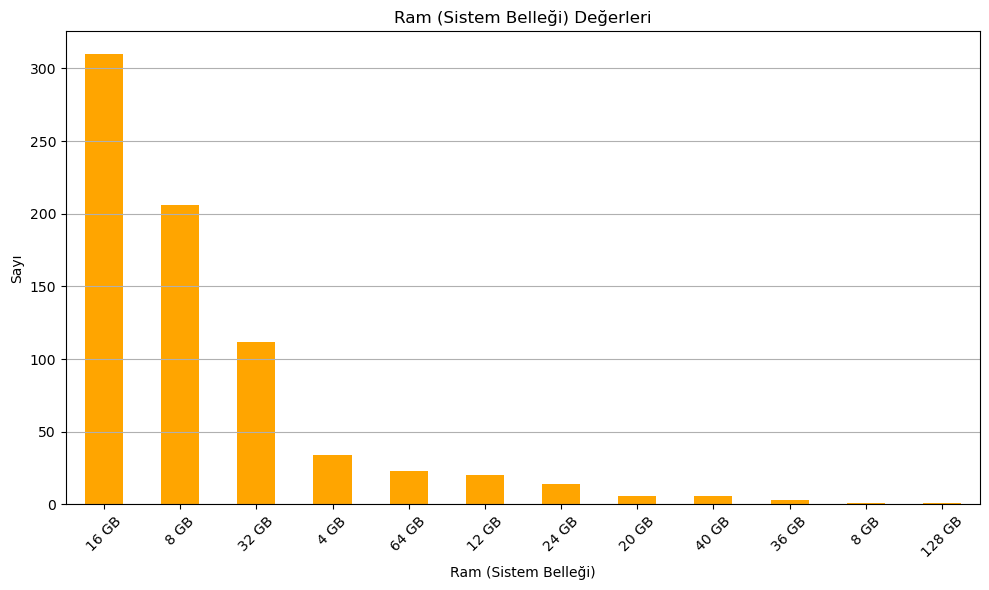

In [515]:
# 'Ram (Sistem Belleği)' sütunundaki değerlerin sayısı
ram_degerleri = df['Ram (Sistem Belleği)'].value_counts()

# Bar grafiği 
plt.figure(figsize=(10, 6))
ram_degerleri.plot(kind='bar', color='orange')
plt.xlabel('Ram (Sistem Belleği)')
plt.ylabel('Sayı')
plt.title('Ram (Sistem Belleği) Değerleri')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.tight_layout() 
plt.show()

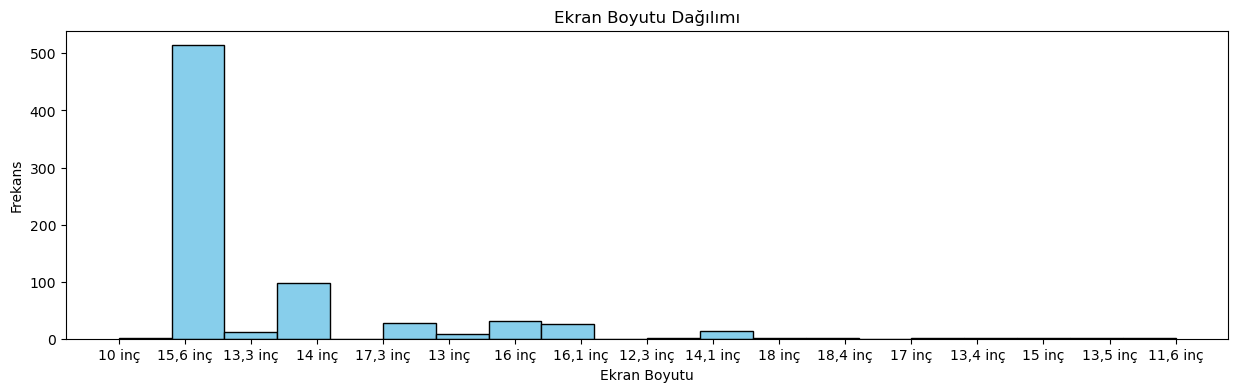

In [516]:
plt.figure(figsize=(15, 4))  
plt.hist(df['Ekran Boyutu'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Ekran Boyutu')
plt.ylabel('Frekans')
plt.title('Ekran Boyutu Dağılımı')
plt.show()

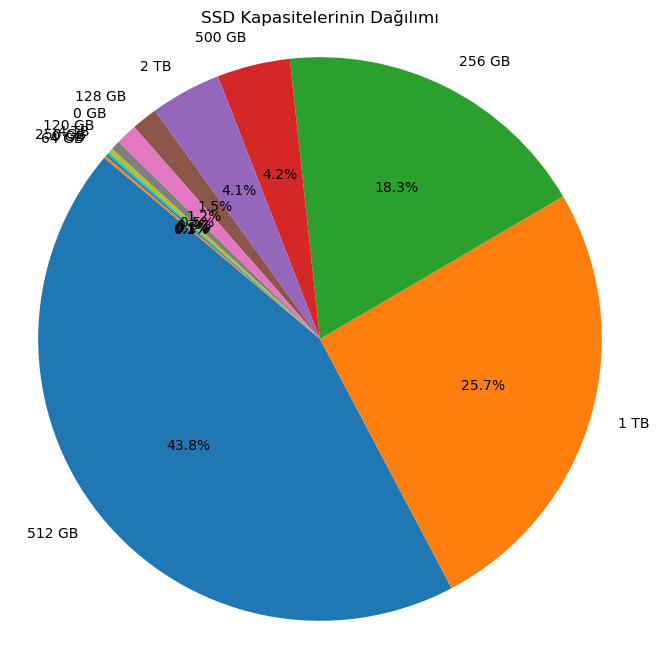

In [517]:
# 'SSD Kapasitesi' sütunundaki değerlerin sayısı
ssd_degerleri = df['SSD Kapasitesi'].value_counts()

# Pasta grafiği
plt.figure(figsize=(8, 8))
plt.pie(ssd_degerleri, labels=ssd_degerleri.index, autopct='%1.1f%%', startangle=140)
plt.title('SSD Kapasitelerinin Dağılımı')
plt.axis('equal')  
plt.show()

# Kategorik Değişkenlere Veri Ön İşleme Yapılması


In [518]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def preprocessing(df):
    
    df_without_duplicates = df.drop_duplicates(inplace=True)
    
    df['Bellek Hızı'] = df['Bellek Hızı'].str.replace('MHz', '',case=True).astype(float)
    df['Bellek Hızı'] = df['Bellek Hızı'].astype(str).str.replace('MHz', '', case=True).astype(float)
    
    
    df['Ekran Boyutu'] = df['Ekran Boyutu'].str.replace('inç', '').str.replace(',', '.').str.strip().astype(float)
    
    df = df.drop('Cihaz Ağırlığı', axis=1)
    df = df.drop('İşlemci', axis=1)
    df = df.drop('Max Ekran Çözünürlüğü', axis=1)
    df = df.drop('Ekran Panel Tipi', axis=1)
    df = df.drop('İşletim Sistemi', axis=1)
    df = df.drop('Ürün Modeli', axis=1)
    
   
    label_encoder = LabelEncoder()
    df['Ekran Kartı Bellek Tipi'].fillna('Unknown', inplace=True)
    df['Ekran Kartı Bellek Tipi'] = label_encoder.fit_transform(df['Ekran Kartı Bellek Tipi'])

    df['Ekran Kartı Hafızası'] = df['Ekran Kartı Hafızası'].replace(' GB', '', regex=True)
    df['Ekran Kartı Hafızası'] = df['Ekran Kartı Hafızası'].replace('Paylaşımlı', '0', regex=True)
    df['Ekran Kartı Hafızası'] = pd.to_numeric(df['Ekran Kartı Hafızası'], errors='coerce')

    df['Ekran Kartı Tipi'] = df['Ekran Kartı Tipi'].map({'Yüksek Seviye Harici Ekran Kartı': 2, 'Harici Ekran Kartı': 1, 'Dahili Ekran Kartı': 0})

    

    df['İşlemci Nesli'] = df['İşlemci Nesli'].replace(['Apple M2', 'Apple M2 Max', 'Apple M2 Pro'], 'Apple')
    df['İşlemci Nesli'] = df['İşlemci Nesli'].replace(['İntel N Serisi'], 'Intel')
    df['İşlemci Nesli'].fillna('Unknown', inplace=True)
    
    #df = pd.get_dummies(df, columns=['Ekran Panel Tipi'], prefix='Panel')

    label_encoder = LabelEncoder()
    df['İşlemci Nesli'] = label_encoder.fit_transform(df['İşlemci Nesli'])

    #df = pd.get_dummies(df, columns=['İşletim Sistemi'], prefix='İşletim')

    df['Kart Okuyucu'] = df['Kart Okuyucu'].map({'Var': 1, 'Yok': 0})
    df['Kart Okuyucu'].fillna(0, inplace=True)

    df['Maksimum İşlemci Hızı'] = df['Maksimum İşlemci Hızı'].str.replace(',', '.').str.replace('GHz', '').str.replace('Ghz', '').astype(float)
   
    label_encoder = LabelEncoder()
    df['Parmak İzi Okuyucu'] = label_encoder.fit_transform(df['Parmak İzi Okuyucu'].astype(str))

    df['Ram (Sistem Belleği)'] = df['Ram (Sistem Belleği)'].fillna('NaN').replace('\xa0', '', regex=True).replace(' GB', '', regex=True)
    df['Ram (Sistem Belleği)'] = df['Ram (Sistem Belleği)'].replace('NaN', np.nan)
    df['Ram (Sistem Belleği)'] = pd.to_numeric(df['Ram (Sistem Belleği)'], errors='coerce')
    df['Ram (Sistem Belleği)'] = df['Ram (Sistem Belleği)'].fillna('NaN').replace('\xa0', '', regex=True).replace(' GB', '', regex=True)
    df['Ram (Sistem Belleği)'] = df['Ram (Sistem Belleği)'].replace('NaN', -1)
    df['Ram (Sistem Belleği)'] = pd.to_numeric(df['Ram (Sistem Belleği)'], errors='coerce')

    df['SSD Kapasitesi'] = df['SSD Kapasitesi'].fillna('NaN').replace(' TB', '000', regex=True).replace(' GB','', regex=True)
    df['SSD Kapasitesi'] = df['SSD Kapasitesi'].replace('NaN', np.nan)
    df['SSD Kapasitesi'] = df['SSD Kapasitesi'].str.replace(' TB', '').astype(float) * 1024
    df['SSD Kapasitesi'] = pd.to_numeric(df['SSD Kapasitesi'], errors='coerce')

    #df = pd.get_dummies(df, columns=['Ürün Modeli'], prefix='Model')

    price_mapping = {
        'Çok Yüksek': 4,
        'Yüksek': 3,
        'Orta': 2,
        'Düşük': 1,
        'Çok Düşük': 0
    }

    df['Fiyat'].replace(price_mapping, inplace=True)
    
    for column in df.columns:
        if df[column].dtype != 'object' and df[column].isnull().sum() > 0:
            df[column].fillna(df[column].mean(), inplace=True)

    return df

df=preprocessing(df)


In [519]:
df.head(20)

,Bellek Hızı,Ekran Boyutu,Ekran Kartı Bellek Tipi,Ekran Kartı Hafızası,Ekran Kartı Tipi,İşlemci Nesli,Kart Okuyucu,Aydınlatma,Maksimum İşlemci Hızı,Parmak İzi Okuyucu,Ram (Sistem Belleği),SSD Kapasitesi,Fiyat
0,1066.000000,10.0,7,1.0,0.593056,0,0.0,0,1.05,2,-1.0,1024000.0,4
2,1066.000000,10.0,7,1.0,0.593056,0,0.0,0,1.05,2,-1.0,1024000.0,2
3,3200.000000,15.6,2,2.0,1.000000,1,1.0,0,3.60,1,8.0,524288.0,1
4,3200.000000,15.6,3,2.0,1.000000,1,0.0,0,3.60,1,12.0,1024000.0,1
5,2933.000000,15.6,4,4.0,2.000000,1,0.0,0,4.50,1,16.0,524288.0,1
6,2933.000000,15.6,4,4.0,2.000000,1,0.0,1,4.50,2,8.0,524288.0,1
7,3200.000000,15.6,4,4.0,1.000000,1,0.0,1,4.50,0,8.0,262144.0,1
8,3200.000000,15.6,4,4.0,2.000000,1,0.0,1,4.50,1,32.0,524288.0,2
9,3200.000000,15.6,4,4.0,2.000000,1,0.0,1,4.50,1,16.0,262144.0,2
10,3200.000000,15.6,4,4.0,2.000000,1,0.0,1,4.50,1,16.0,262144.0,1


In [520]:
df.isnull().sum()

Bellek Hızı                0
Ekran Boyutu               0
Ekran Kartı Bellek Tipi    0
Ekran Kartı Hafızası       0
Ekran Kartı Tipi           0
İşlemci Nesli              0
Kart Okuyucu               0
Aydınlatma                 0
Maksimum İşlemci Hızı      0
Parmak İzi Okuyucu         0
Ram (Sistem Belleği)       0
SSD Kapasitesi             0
Fiyat                      0
dtype: int64

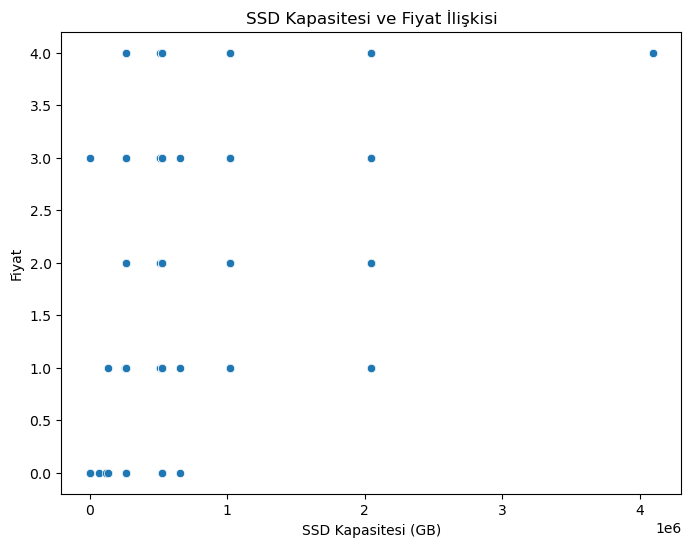

In [521]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SSD Kapasitesi', y='Fiyat', data=df)
plt.title('SSD Kapasitesi ve Fiyat İlişkisi')
plt.xlabel('SSD Kapasitesi (GB)')
plt.ylabel('Fiyat')
plt.show()

Text(0.5, 1.0, 'Bellek Hızı ve Fiyat Arasındaki İlişki')

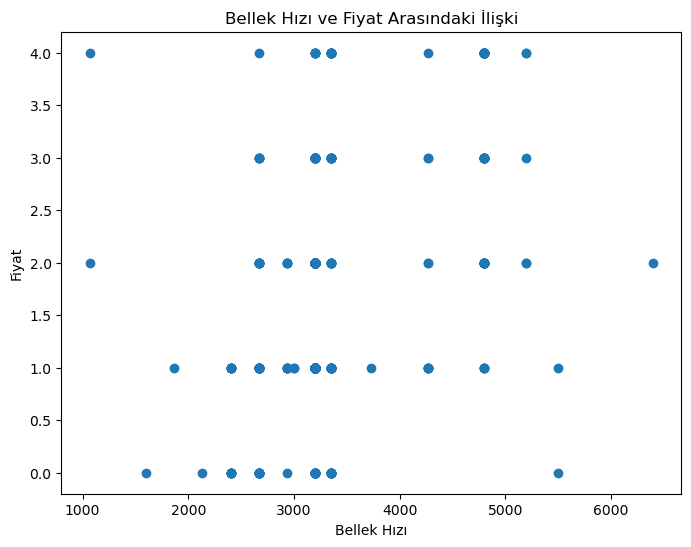

In [522]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Bellek Hızı'], df['Fiyat'])
plt.xlabel('Bellek Hızı')
plt.ylabel('Fiyat')
plt.title('Bellek Hızı ve Fiyat Arasındaki İlişki')

Text(0.5, 1.0, 'İşlemci Nesli Frekansı')

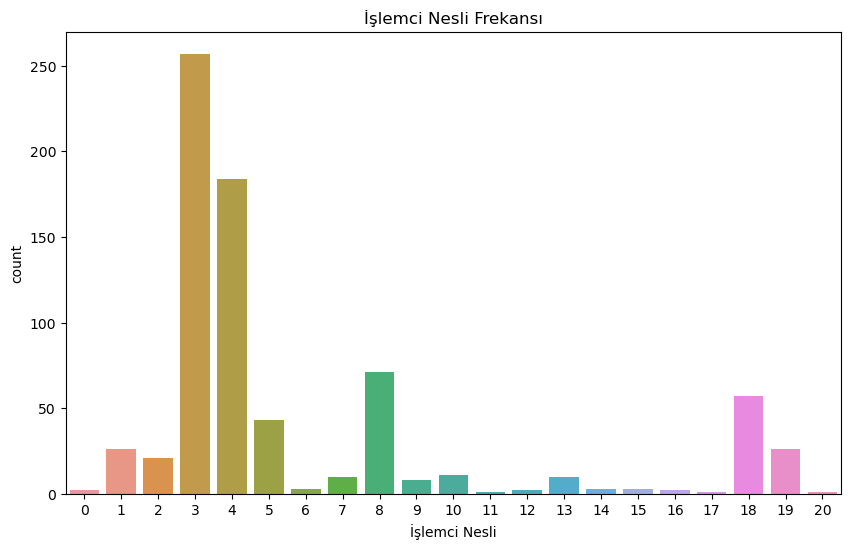

In [523]:
plt.figure(figsize=(10, 6))
sns.countplot(x='İşlemci Nesli', data=df)
plt.title('İşlemci Nesli Frekansı')

Text(0.5, 1.0, 'Ekran Kartı Tipi ve Fiyat İlişkisi')

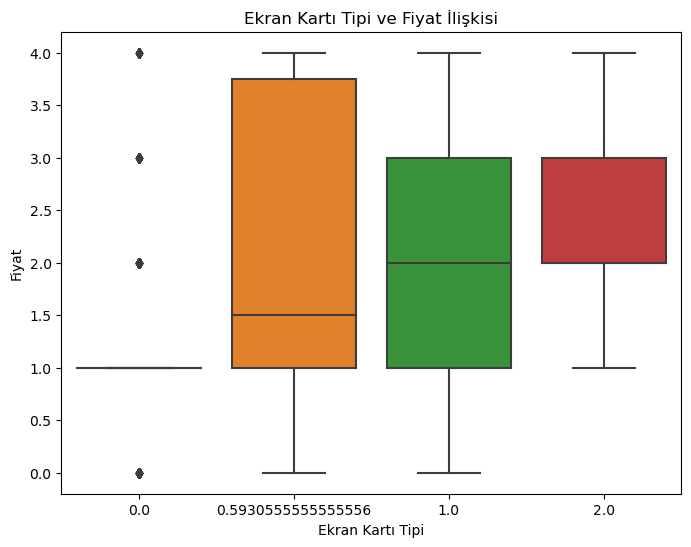

In [524]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Ekran Kartı Tipi', y='Fiyat', data=df)
plt.title('Ekran Kartı Tipi ve Fiyat İlişkisi')

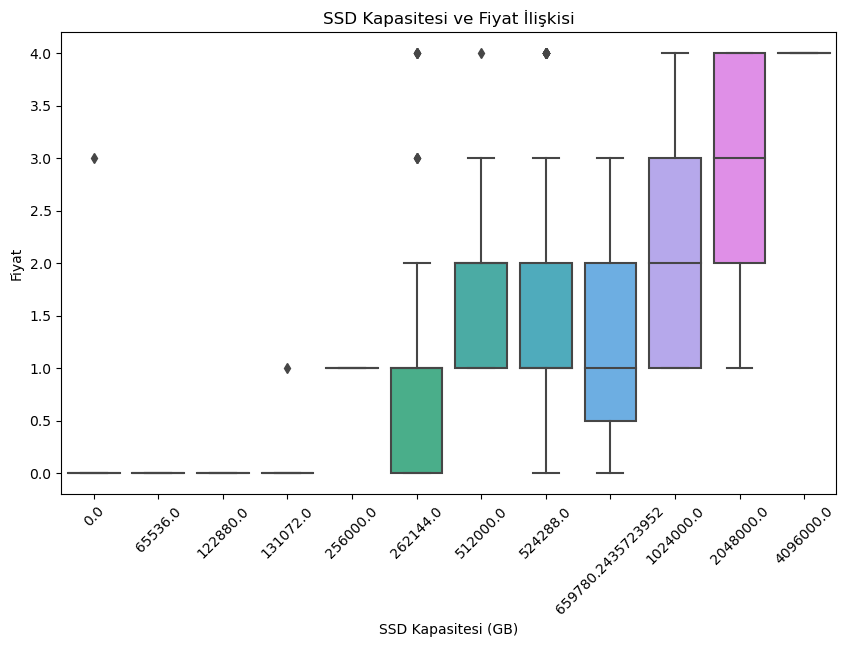

In [525]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SSD Kapasitesi', y='Fiyat', data=df)
plt.xlabel('SSD Kapasitesi (GB)')
plt.ylabel('Fiyat')
plt.title('SSD Kapasitesi ve Fiyat İlişkisi')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Ekran Kartı Tipi', ylabel='Fiyat'>

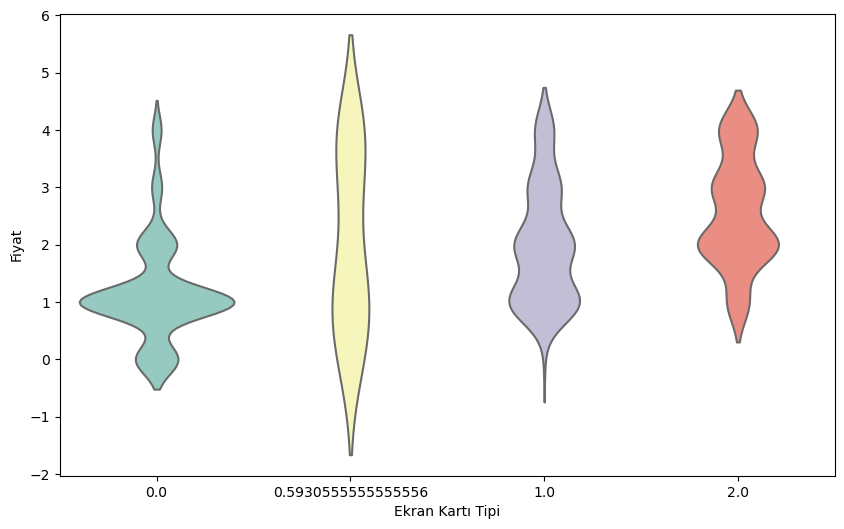

In [526]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='Ekran Kartı Tipi', y='Fiyat', data=df, palette='Set3', inner=None)

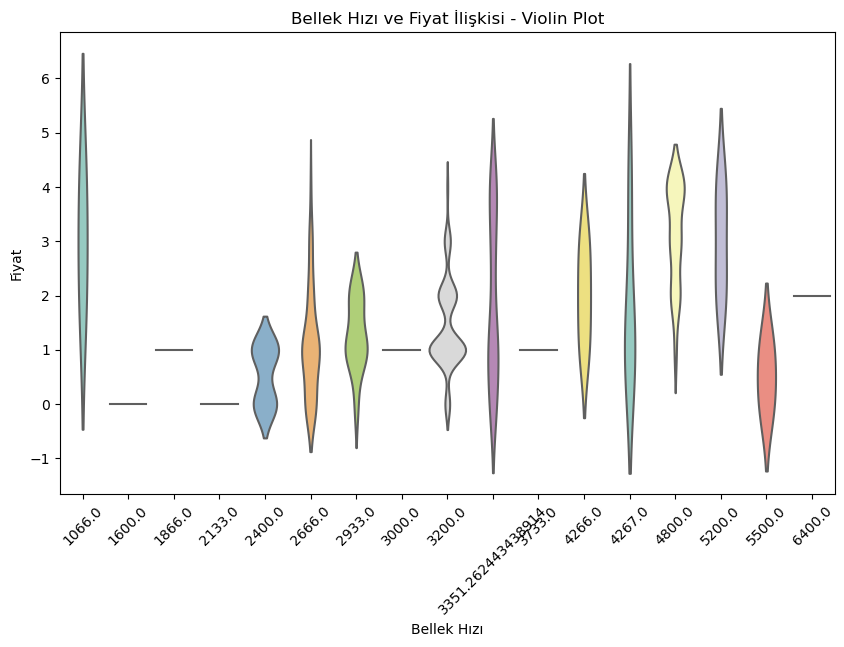

In [527]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='Bellek Hızı', y='Fiyat', data=df, palette='Set3', inner=None) 

plt.xlabel('Bellek Hızı')
plt.ylabel('Fiyat')
plt.title('Bellek Hızı ve Fiyat İlişkisi - Violin Plot')
plt.xticks(rotation=45)
plt.show()

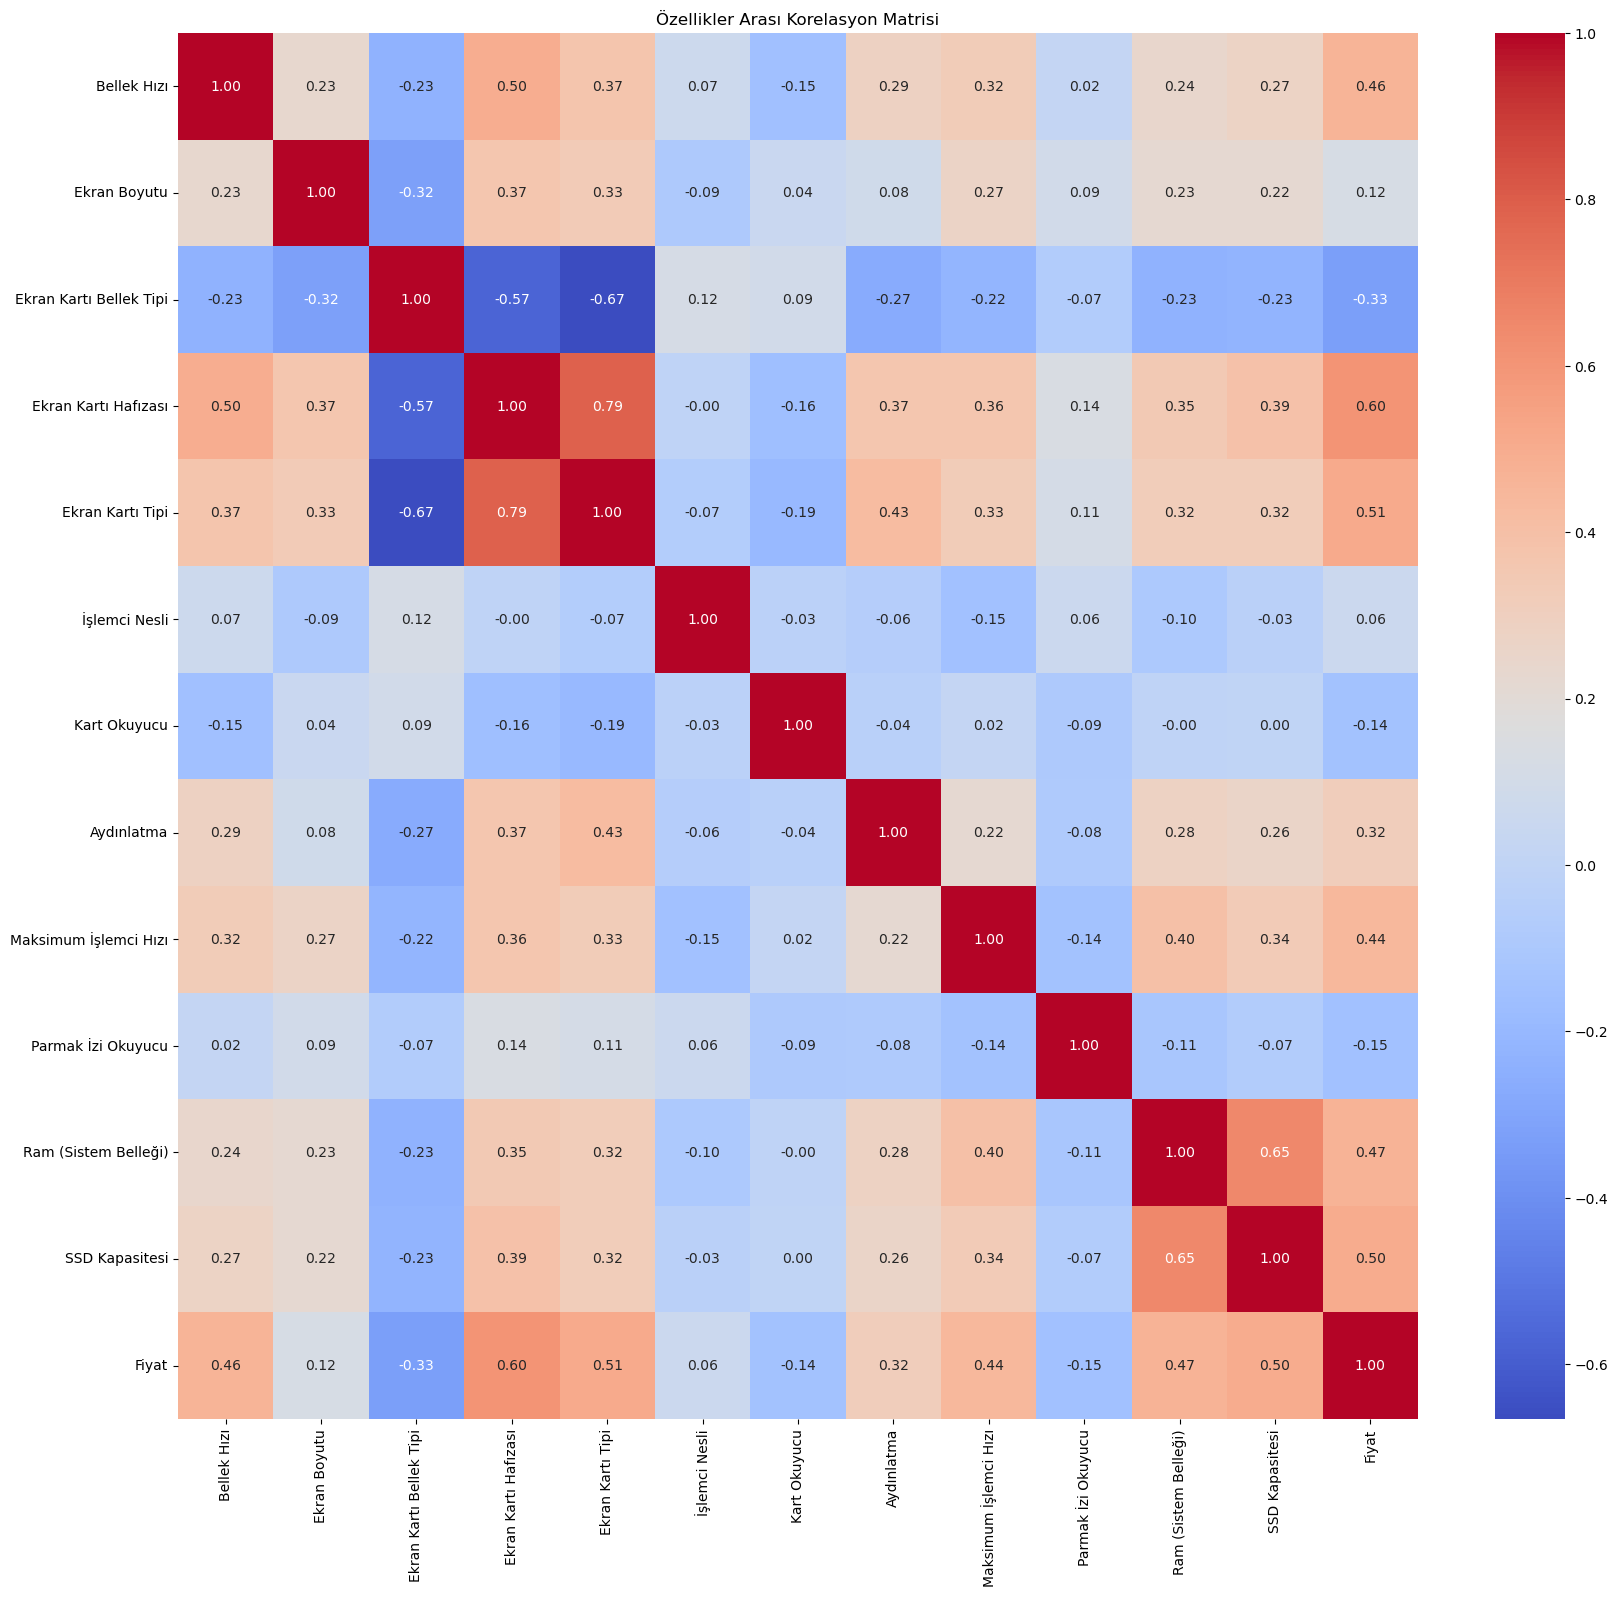

In [528]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 18))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()


# Model Eğitim ve Test

In [529]:

# Eğitim fonksiyonu
def classification():
    df = pd.read_excel("data.xlsx")  # Eğitim verisi
    df = preprocessing(df)  # Veri ön işleme 

    x = df.drop('Fiyat', axis=1)  # Bağımsız değişkenler
    y = df['Fiyat']  # Bağımlı değişken

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier()  # Modeli tanımla
    model.fit(x_train, y_train)  # eğitim

    y_pred = model.predict(x_test)  # tahmin 

    accuracy = accuracy_score(y_test, y_pred)  # Doğruluk
    
    joblib.dump(model, 'bilgisayar_model.pkl')

    return accuracy, 'bilgisayar_model.pkl'  # Eğitim sonucunu ve model dosya yolu


# Test fonksiyonu
def test(model_path, df_test):
    # Eğitilen model
    loaded_model = joblib.load(model_path)
    
    # Test verisi
    df_test = pd.read_excel('test.xlsx')  # Test verisi

    df_test = preprocessing(df_test)  
    x = df_test.drop('Fiyat', axis=1)  # Bağımsız değişken
    y = df_test['Fiyat']  # Bağımlı değişken

    y_pred = loaded_model.predict(x)  # tahmin

    accuracy = accuracy_score(y, y_pred)  # Doğruluk
    return accuracy

# Eğitim sonucu ve eğitilmiş modelin alınması
trained_accuracy, model_path = classification()
print("Eğitim Modeli Sonucu:", trained_accuracy)



# Test sonucu
test_result = test(model_path, df_test)  # Eğitilmiş model ile test
print("Test Modeli Sonucu:", test_result)

Eğitim Modeli Sonucu: 0.738255033557047
Test Modeli Sonucu: 0.72
